In [1]:
from glob import glob
import numpy as np
import rasterio as rio
import os

# Importing dataset

In [2]:
root = '.\\data\\processed_data\\train'

In [3]:
fire = glob(os.path.join(root, "fire", '*.tif'))
nofire = glob(os.path.join(root, "nofire", '*.tif'))

In [4]:
X = []
y = []
for i in fire:
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(1)
for i in nofire:
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(0)

In [5]:
print(X[0].shape)
print(len(X))

(32, 32)
3528


# stack data

In [6]:
X = np.stack(X)
y = np.array(y)
print(X.shape)

(3528, 32, 32)


# Flatten image array

In [7]:
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))
print(n_samples)

3528


# Data normalization

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

# Split the dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)

# class name

In [10]:
class_names = ['no fire', 'fire']

# <span style="color:red;">SVM classifier</span>

In [11]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train,y_train)
svm_predict = svm_classifier.predict(X_test)

Confusion matrix : 
 [[142 108]
 [155 301]]
Accuracy Score :  0.6274787535410765
Classification report : 
               precision    recall  f1-score   support

           0       0.48      0.57      0.52       250
           1       0.74      0.66      0.70       456

    accuracy                           0.63       706
   macro avg       0.61      0.61      0.61       706
weighted avg       0.64      0.63      0.63       706



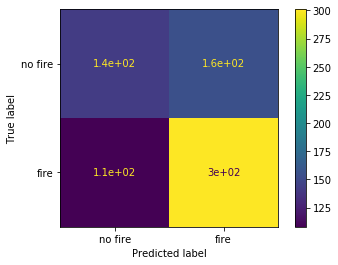

In [12]:
from sklearn import metrics
print("Confusion matrix : \n",metrics.confusion_matrix(svm_predict,y_test))
print("Accuracy Score : ",metrics.accuracy_score(svm_predict,y_test))
print("Classification report : \n",metrics.classification_report(svm_predict,y_test))
metrics.plot_confusion_matrix(svm_classifier, X_test, y_test,display_labels=class_names)

# <span style="color:red;">KNN classifier</span>

In [13]:
neighbors = list(range(2,9,1))

For k =  2
Confusion matrix : 
 [[200 254]
 [ 97 155]]
Accuracy Score :  0.5028328611898017
Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53       454
           1       0.38      0.62      0.47       252

    accuracy                           0.50       706
   macro avg       0.53      0.53      0.50       706
weighted avg       0.57      0.50      0.51       706



For k =  3
Confusion matrix : 
 [[136 180]
 [161 229]]
Accuracy Score :  0.5169971671388102
Classification report : 
               precision    recall  f1-score   support

           0       0.46      0.43      0.44       316
           1       0.56      0.59      0.57       390

    accuracy                           0.52       706
   macro avg       0.51      0.51      0.51       706
weighted avg       0.51      0.52      0.52       706



For k =  4
Confusion matrix : 
 [[183 230]
 [114 179]]
Accuracy Score :  0.5127478753541076
Classification

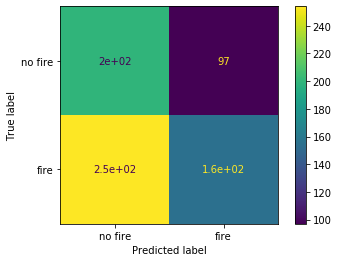

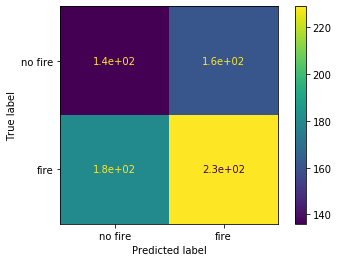

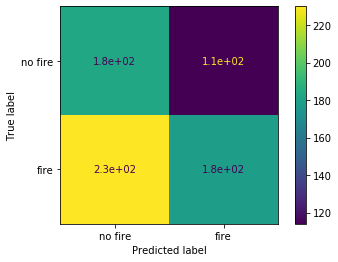

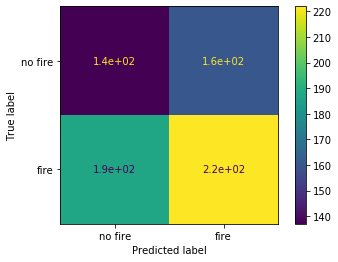

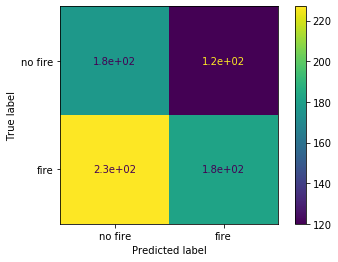

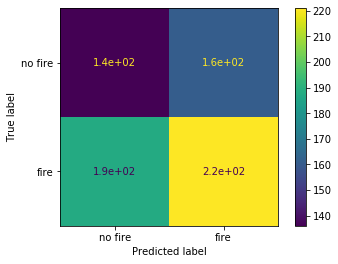

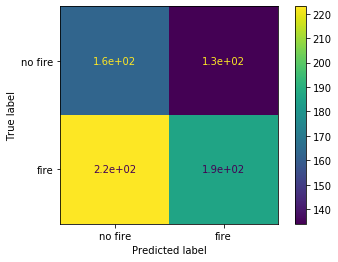

In [14]:
from sklearn.neighbors import KNeighborsClassifier

for k in neighbors:
    print("For k = ",k)
    knn_classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    knn_classifier.fit(X_train, y_train)
    knn_pred = knn_classifier.predict(X_test)
    print("Confusion matrix : \n",metrics.confusion_matrix(knn_pred,y_test))
    print("Accuracy Score : ",metrics.accuracy_score(knn_pred,y_test))
    print("Classification report : \n",metrics.classification_report(knn_pred,y_test))
    metrics.plot_confusion_matrix(knn_classifier, X_test, y_test,display_labels=class_names)
    print("\n")

# <span style="color:red;">Random Forest classifier</span>

In [15]:
from sklearn.ensemble import RandomForestClassifier
rr_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )
rr_classifier.fit(X_train,y_train)
rr_pred = rr_classifier.predict(X_test)

Confusion matrix : 
 [[173  85]
 [124 324]]
Accuracy Score :  0.7039660056657224
Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.67      0.62       258
           1       0.79      0.72      0.76       448

    accuracy                           0.70       706
   macro avg       0.69      0.70      0.69       706
weighted avg       0.72      0.70      0.71       706



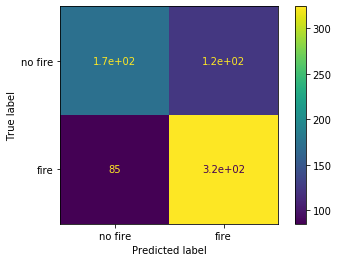

In [16]:
from sklearn import metrics
print("Confusion matrix : \n",metrics.confusion_matrix(rr_pred,y_test))
print("Accuracy Score : ",metrics.accuracy_score(rr_pred,y_test))
print("Classification report : \n",metrics.classification_report(rr_pred,y_test))
metrics.plot_confusion_matrix(rr_classifier, X_test, y_test,display_labels=class_names)

# <span style="color:red;">CNN</span>

In [18]:
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [42]:
model=Sequential()
model.add(Dense(12, input_dim=1024, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
2822/2822 [==============================] - 1s 237us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 2/100
2822/2822 [==============================] - 0s 177us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 3/100
2822/2822 [==============================] - 1s 181us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 4/100
2822/2822 [==============================] - 1s 181us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 5/100
2822/2822 [==============================] - 1s 179us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 6/100
2822/2822 [==============================] - 0s 176us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 7/100
2822/2822 [==============================] - 0s 176us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 8/100
2822/2822 [==============================] - 1s 205us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 9/100
2822/2822 [==============================] - 1s 188us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 10/100
2822/2822 [==============================]

2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 79/100
2822/2822 [==============================] - 0s 155us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 80/100
2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 81/100
2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 82/100
2822/2822 [==============================] - 0s 150us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 83/100
2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 84/100
2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 85/100
2822/2822 [==============================] - 1s 191us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 86/100
2822/2822 [==============================] - 0s 153us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 87/100
2822/2822 [==============================] - 0

In [45]:
print(model.summary)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000002DCF5157FC8>>


In [46]:
acc = model.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

2822/2822 [==============================] - 0s 36us/step
Loss: 7.079805206863869  Accuracy: 0.5382707118988037


In [67]:
model2=Sequential()
model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(256,activation="relu"))
model2.add(Dense(1,activation="softmax"))

In [68]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model2.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
2822/2822 [==============================] - 2s 546us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 2/100
2822/2822 [==============================] - 1s 435us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 3/100
2822/2822 [==============================] - 1s 456us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 4/100
2822/2822 [==============================] - 2s 600us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 5/100
2822/2822 [==============================] - 2s 566us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 6/100
2822/2822 [==============================] - 2s 767us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 7/100
2822/2822 [==============================] - 2s 541us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 8/100
2822/2822 [==============================] - 2s 535us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 9/100
2822/2822 [==============================] - 1s 485us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 10/100
2822/2822 [==============================]

2822/2822 [==============================] - 1s 526us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 79/100
2822/2822 [==============================] - 1s 487us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 80/100
2822/2822 [==============================] - 1s 488us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 81/100
2822/2822 [==============================] - 1s 495us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 82/100
2822/2822 [==============================] - 1s 496us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 83/100
2822/2822 [==============================] - 1s 493us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 84/100
2822/2822 [==============================] - 1s 491us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 85/100
2822/2822 [==============================] - 1s 490us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 86/100
2822/2822 [==============================] - 1s 486us/step - loss: 7.0798 - accuracy: 0.5383
Epoch 87/100
2822/2822 [==============================] - 1